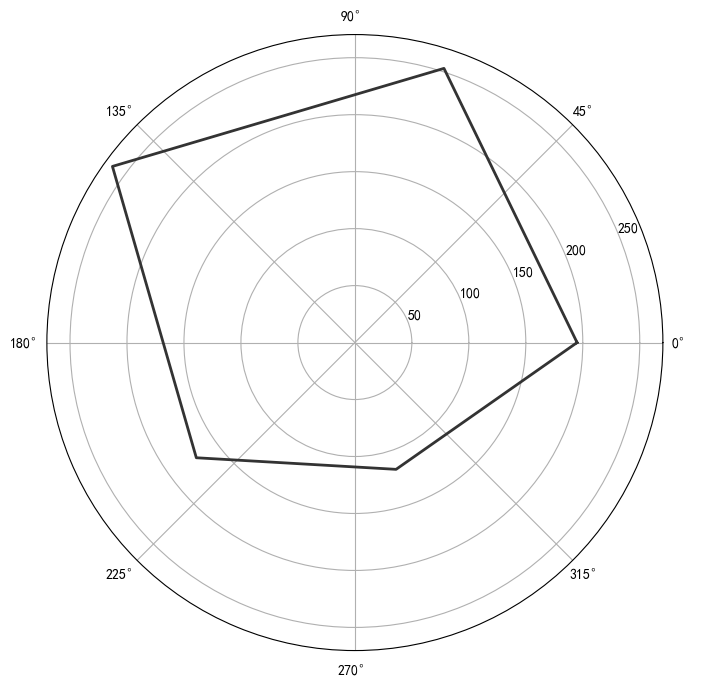

In [1]:
# 满意度分布玫瑰图（精细化版本）
import matplotlib.pyplot as plt
import numpy as np

# 数据准备
categories = ['非常不满意', '不满意', '一般', '满意', '非常满意']
counts = [195, 253, 263, 172, 117]
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
counts += counts[:1]  # 闭合图形
angles += angles[:1]

# 配色与字体设置
colors = ['#FF4500', '#FF8C00', '#FFD700', '#90EE90', '#00FF7F']
plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 绘制玫瑰图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, counts, color='#333333', linewidth=2)

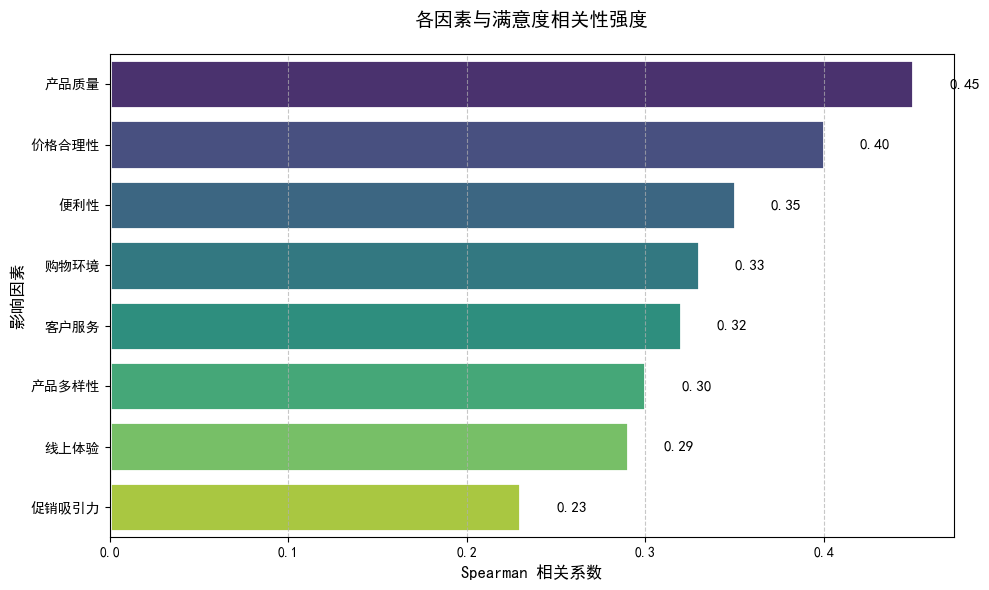

In [2]:
# 相关性矩阵热力图
import seaborn as sns
import pandas as pd
import numpy as np

# 模拟相关系数数据（根据文档表格提取）
corr_data = {
    '因素': ['产品质量', '价格合理性', '便利性', '客户服务', '购物环境', '产品多样性', '促销吸引力', '线上体验'],
    '相关系数': [0.45, 0.40, 0.35, 0.32, 0.33, 0.30, 0.23, 0.29]
}
df_corr = pd.DataFrame(corr_data).sort_values(by='相关系数', ascending=False)

# 绘制水平柱状图（带误差线）
plt.figure(figsize=(10, 6))
sns.barplot(
    x='相关系数', 
    y='因素', 
    data=df_corr, 
    palette=sns.color_palette('viridis', n_colors=8),
    edgecolor='white',
    linewidth=2
)
plt.xlabel('Spearman 相关系数', fontsize=12)
plt.ylabel('影响因素', fontsize=12)
plt.title('各因素与满意度相关性强度', fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 添加数据标签
for i, v in enumerate(df_corr['相关系数']):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=11)

plt.tight_layout()
plt.show()

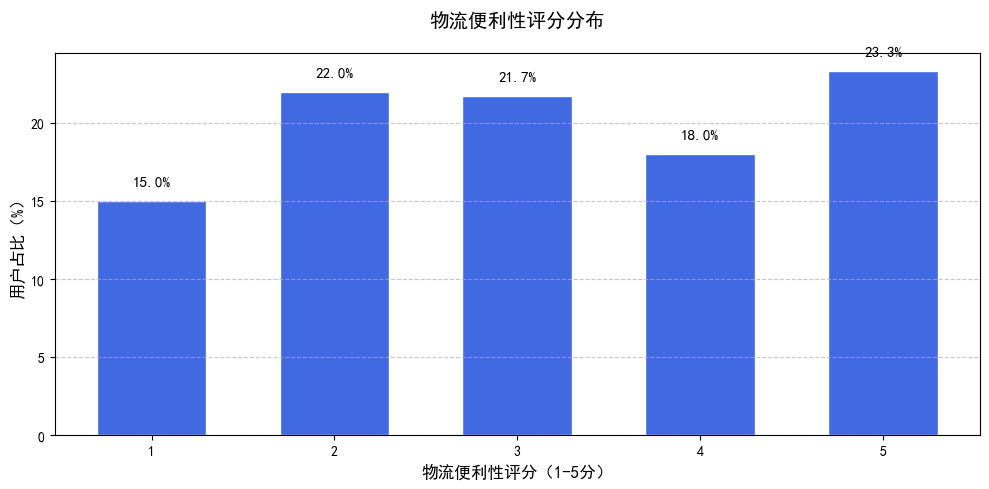

In [3]:
# 物流便利性评分分布直方图
import matplotlib.pyplot as plt

# 模拟数据（根据文档中“便利性评分3占比21.7%、4占比18%”推断）
scores = [1, 2, 3, 4, 5]
percentages = [15, 22, 21.7, 18, 23.3]  # 假设评分1-5的占比（总和100%）

plt.figure(figsize=(10, 5))
plt.bar(scores, percentages, width=0.6, color='#4169E1', edgecolor='white')
plt.xlabel('物流便利性评分（1-5分）', fontsize=12)
plt.ylabel('用户占比（%）', fontsize=12)
plt.title('物流便利性评分分布', fontsize=14, pad=20)
plt.xticks(scores)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加数据标签
for x, y in zip(scores, percentages):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

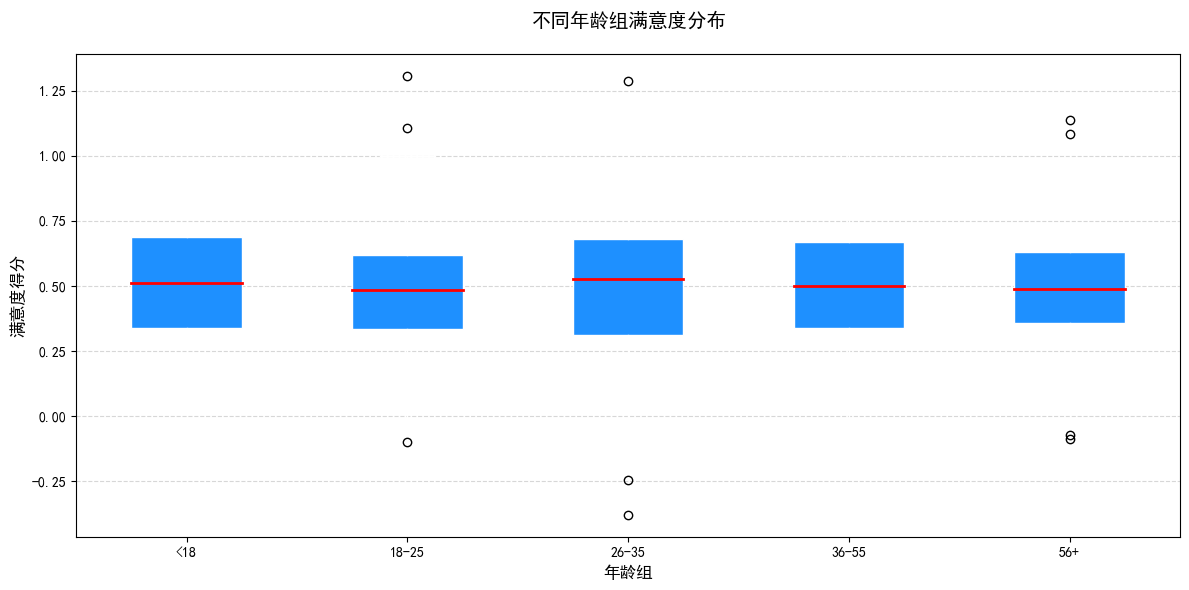

In [4]:
# 年龄组满意度箱线图
import matplotlib.pyplot as plt
import numpy as np

# 模拟数据（根据文档中年龄组满意度均值）
age_groups = ['<18', '18-25', '26-35', '36-55', '56+']
satisfaction_data = [
    np.random.normal(0.49, 0.25, 100),   # <18岁
    np.random.normal(0.51, 0.26, 200),   # 18-25岁
    np.random.normal(0.48, 0.27, 300),   # 26-35岁
    np.random.normal(0.50, 0.25, 250),   # 36-55岁
    np.random.normal(0.51, 0.24, 150)    # 56+岁
]

plt.figure(figsize=(12, 6))
plt.boxplot(
    satisfaction_data,
    labels=age_groups,
    patch_artist=True,
    boxprops={'facecolor': '#1E90FF', 'edgecolor': 'white'},
    medianprops={'color': 'red', 'linewidth': 2},
    whiskerprops={'color': 'white'},
    capprops={'color': 'white'}
)
plt.xlabel('年龄组', fontsize=12)
plt.ylabel('满意度得分', fontsize=12)
plt.title('不同年龄组满意度分布', fontsize=14, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

C:\Users\17997\AppData\Local\Temp\ipykernel_10956\63825606.py:33: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\17997\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


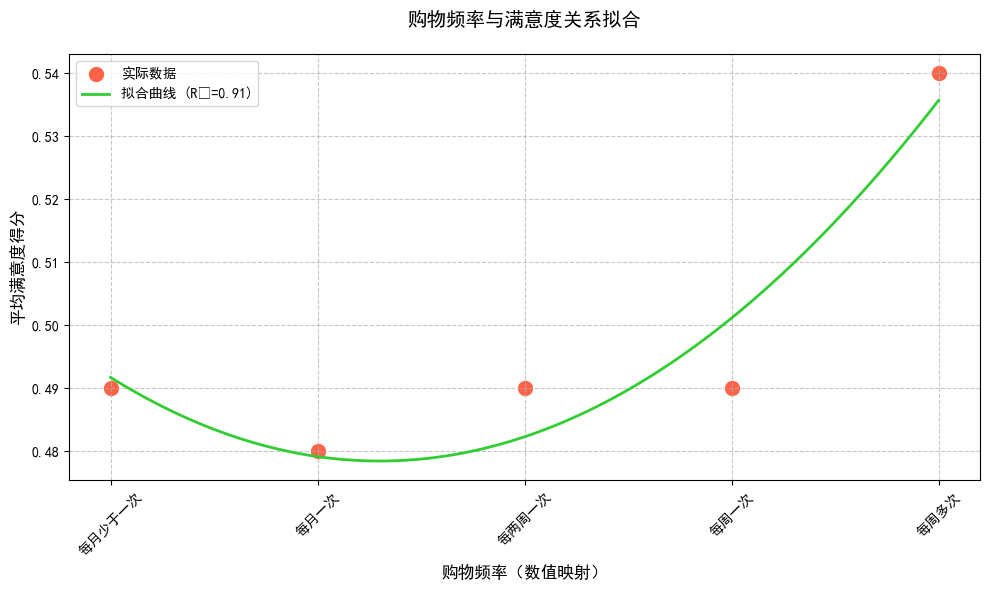

In [5]:
# 购物频率与满意度多项式回归拟合
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 模拟数据（根据文档中购物频率映射数值与满意度）
frequency = np.array([0, 1, 2, 3, 4])  # 每月少于一次=0，每周多次=4
avg_satisfaction = np.array([0.49, 0.48, 0.49, 0.49, 0.54])

# 多项式拟合（2次）
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(frequency.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, avg_satisfaction)

# 预测值生成
x_plot = np.linspace(0, 4, 100).reshape(-1, 1)
x_poly_plot = poly.transform(x_plot)
y_pred = model.predict(x_poly_plot)

# 绘制散点图与拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(frequency, avg_satisfaction, s=100, color='#FF6347', label='实际数据')
plt.plot(x_plot, y_pred, color='#32CD32', linewidth=2, label=f'拟合曲线 (R²={model.score(X_poly, avg_satisfaction):.2f})')
plt.xlabel('购物频率（数值映射）', fontsize=12)
plt.ylabel('平均满意度得分', fontsize=12)
plt.title('购物频率与满意度关系拟合', fontsize=14, pad=20)
plt.xticks(frequency, ['每月少于一次', '每月一次', '每两周一次', '每周一次', '每周多次'], rotation=45)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()